# **Problem Statement - Uber Data Analysis**

**Context**

Uber Technologies, Inc. is an American multinational transportation network company based in San Francisco and has operations in approximately 72 countries and 10,500 cities. In the fourth quarter of 2021, Uber had 118 million monthly active users worldwide and generated an average of 19 million trips per day.

Ridesharing is a very volatile market and demand fluctuates wildly with time, place, weather, local events, etc. The key to being successful in this business is to be able to detect patterns in these fluctuations and cater to demand at any given time.

As a newly hired Data Scientist in Uber's New York Office, you have been given the task of extracting insights from data that will help the business better understand the demand profile and take appropriate actions to drive better outcomes for the business. Your goal is to identify good insights that are potentially actionable, i.e., the business can do something with it.

**Objective**

To extract actionable insights around demand patterns across various factors.

**Key Questions**

1. What are the different variables that influence pickups?

2. Which factor affects the pickups the most? What could be plausible reasons for that?

3. What are your recommendations to Uber management to capitalize on fluctuating demand?

**Guidelines**

Perform univariate analysis on the data to better understand the variables at your disposal.

Perform bivariate analysis to better understand the relationships between different variables.

Create visualizations to explore data and extract the insights.

**Data Dictionary**
The data contains information about the weather, location, and pickups.

 - pickup_dt: Date and time of the pick-up
 - borough: NYC's borough
 - pickups: Number of pickups for the period
 - spd: Wind speed in miles/hour
 - vsb: Visibility in miles to the nearest tenth
 - temp: Temperature in Fahrenheit
 - dewp: Dew point in Fahrenheit
 - slp: Sea level pressure
 - pcp01: 1-hour liquid precipitation
 - pcp06: 6-hour liquid precipitation
 - pcp24: 24-hour liquid precipitation
 - sd: Snow depth in inches
 - hday: Being a holiday (Y) or not (N)

In [ ]:
# Import Libraries

## Data
import pandas as pd
import numpy as np

##Visualtization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

## Warings
import warnings

# Mount Google Colab drive
from google.colab import drive
drive.mount('/content/drive')

# Load data from csv file
data = pd.read_csv('/content/drive/MyDrive/MIT - Data Sciences/Colab Notebooks/Week One - Python for Data Science/Mentored Session/uber.csv')


In [ ]:
# Make sure the data was imported into python
data.head()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y


In [ ]:
data.tail()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
29096,2015-06-30 23:00:00,EWR,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29097,2015-06-30 23:00:00,Manhattan,3828,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29098,2015-06-30 23:00:00,Queens,580,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29099,2015-06-30 23:00:00,Staten Island,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29100,2015-06-30 23:00:00,NaN,3,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N


In [ ]:
# Determine description of the data set
data.describe(include="all")

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
count,29101,26058,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101
unique,4343,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,2015-01-01 01:00:00,Bronx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
freq,7,4343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27980
mean,NaN,NaN,490.215903,5.984924,8.818125,47.669042,30.823065,1017.817938,0.003830,0.026129,0.090464,2.529169,NaN
std,NaN,NaN,995.649536,3.699007,2.442897,19.814969,21.283444,7.768796,0.018933,0.093125,0.219402,4.520325,NaN
min,NaN,NaN,0.000000,0.000000,0.000000,2.000000,-16.000000,991.400000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,1.000000,3.000000,9.100000,32.000000,14.000000,1012.500000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,54.000000,6.000000,10.000000,46.000000,30.000000,1018.200000,0.000000,0.000000,0.000000,0.000000,NaN
75%,NaN,NaN,449.000000,8.000000,10.000000,64.500000,50.000000,1022.900000,0.000000,0.000000,0.050000,2.958333,NaN


In [1]:
# Get dataset information
data.info()

NameError: name 'data' is not defined

In [ ]:
# Check data types
data.dtypes

pickup_dt     object
borough       object
pickups        int64
spd          float64
vsb          float64
temp         float64
dewp         float64
slp          float64
pcp01        float64
pcp06        float64
pcp24        float64
sd           float64
hday          object
dtype: object

**Observations**



1.   **There is information that is missing in the data set. The "bourough" column**
2.   The vaiable pickup_dt (Pickup date) is an object rather than a date
3.   The variable hday may need to be converted to binary boolean



**Univariate Analysis**

                           pickup_dt       pickups           spd  \
count                          29101  29101.000000  29101.000000   
mean   2015-04-02 01:22:19.005532416    490.215903      5.984924   
min              2015-01-01 01:00:00      0.000000      0.000000   
25%              2015-02-15 21:00:00      1.000000      3.000000   
50%              2015-04-02 07:00:00     54.000000      6.000000   
75%              2015-05-17 11:00:00    449.000000      8.000000   
max              2015-06-30 23:00:00   7883.000000     21.000000   
std                              NaN    995.649536      3.699007   

                vsb          temp          dewp           slp         pcp01  \
count  29101.000000  29101.000000  29101.000000  29101.000000  29101.000000   
mean       8.818125     47.669042     30.823065   1017.817938      0.003830   
min        0.000000      2.000000    -16.000000    991.400000      0.000000   
25%        9.100000     32.000000     14.000000   1012.500000      0.00

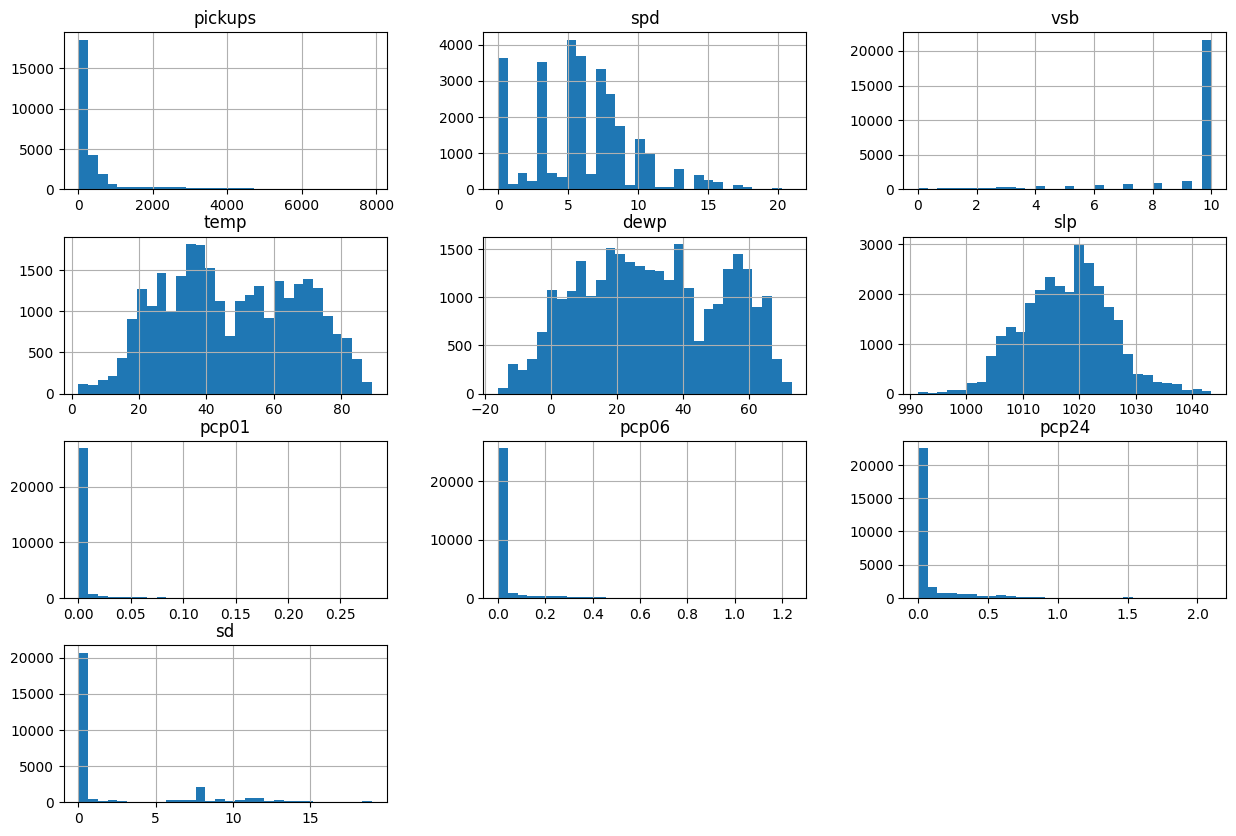

In [50]:
# Convert pickup_dt to datetime
data['pickup_dt'] = pd.to_datetime(data['pickup_dt'])

# Extract time_of_day and day_of_week from pickup_dt
data['time_of_day'] = data['pickup_dt'].dt.hour
data['day_of_week'] = data['pickup_dt'].dt.dayofweek

# Summary statistics
print(data.describe())

# List of numerical variables
numerical_vars = ['pickups', 'spd', 'vsb', 'temp', 'dewp', 'slp', 'pcp01', 'pcp06', 'pcp24', 'sd']
# Filter out columns that are not in the data
numerical_vars = [var for var in numerical_vars if var in data.columns]

# Histograms for numerical variables
data[numerical_vars].hist(bins=30, figsize=(15, 10))
plt.show()

# Bar plots for categorical variables
#categorical_vars = ['borough', 'time_of_day', 'day_of_week', 'hday']
# Filter out columns that are not in the data
#categorical_vars = [var for var in categorical_vars if var in data.columns]

#for var in categorical_vars:
#    plt.figure(figsize=(10, 5))
#   sns.countplot(x=var, data=data)
#    plt.title(f'Distribution of {var}')
#    plt.show()

# Specific plot for borough to check data
#if 'borough' in data.columns:
#    plt.figure(figsize=(10, 5))
#    sns.countplot(x='borough', data=data)
#    plt.title('Distribution of Borough')
#    plt.show()

    # Verify borough counts
#    print(data['borough'].value_counts())


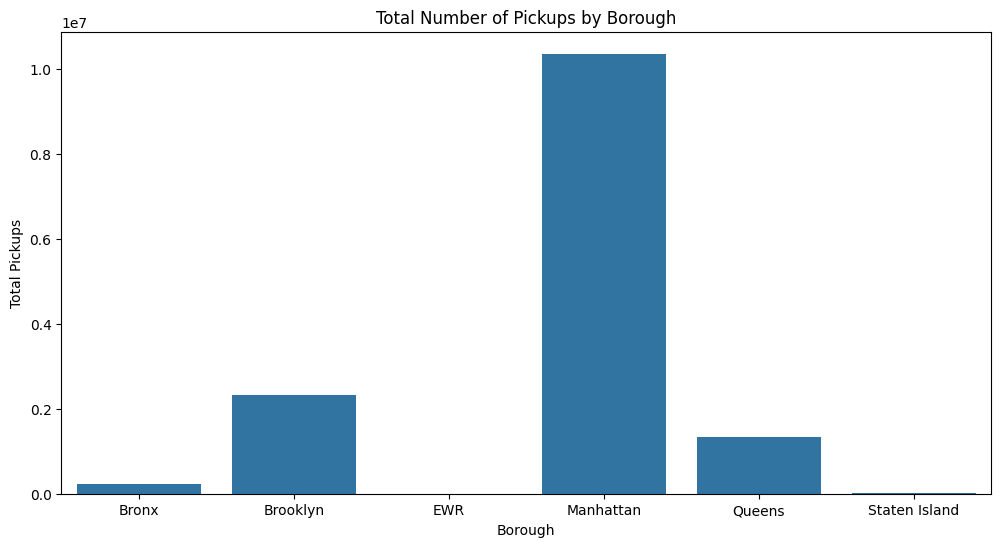

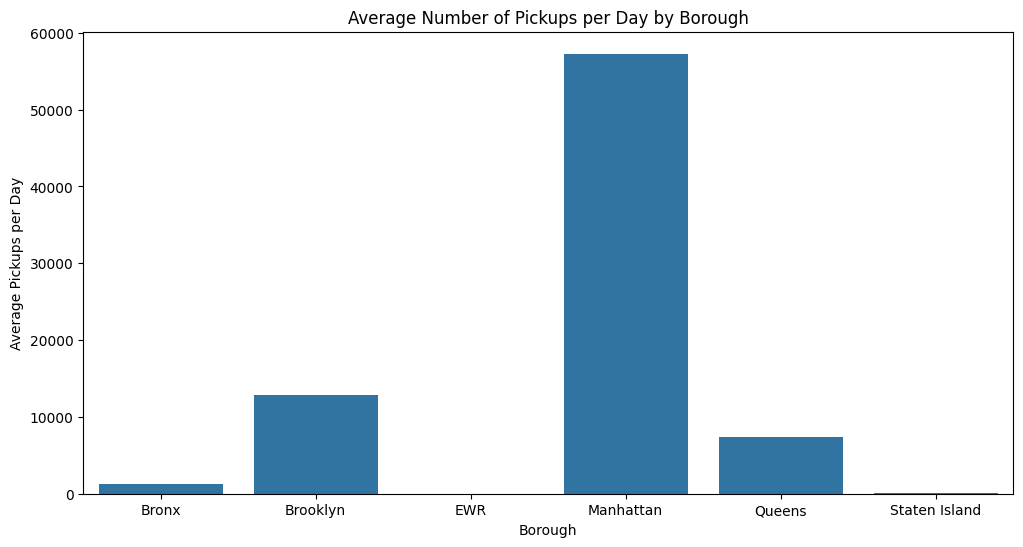

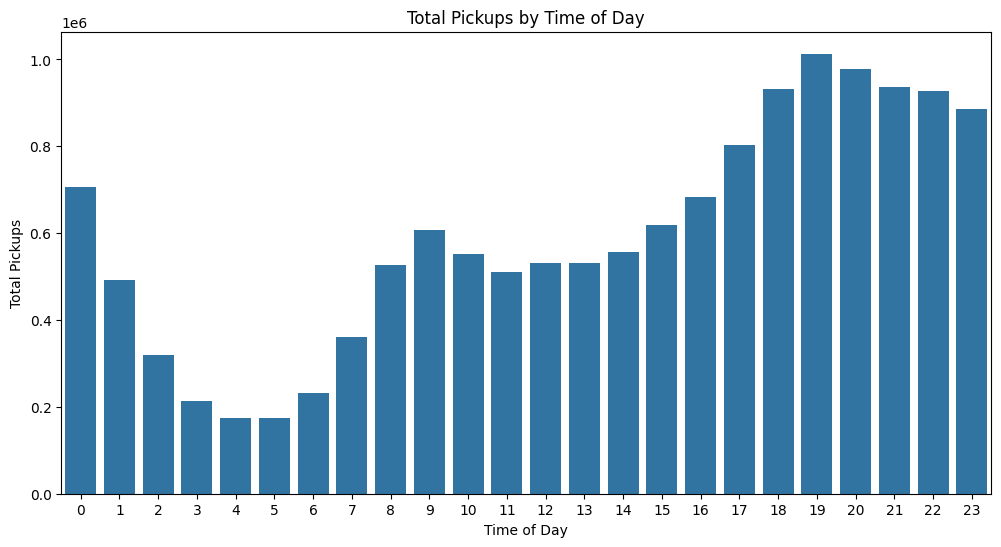

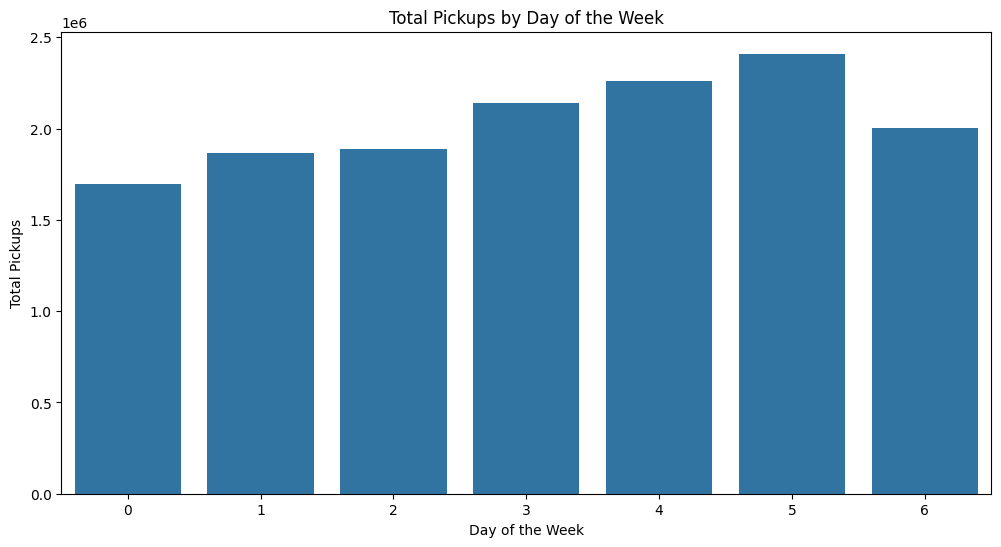

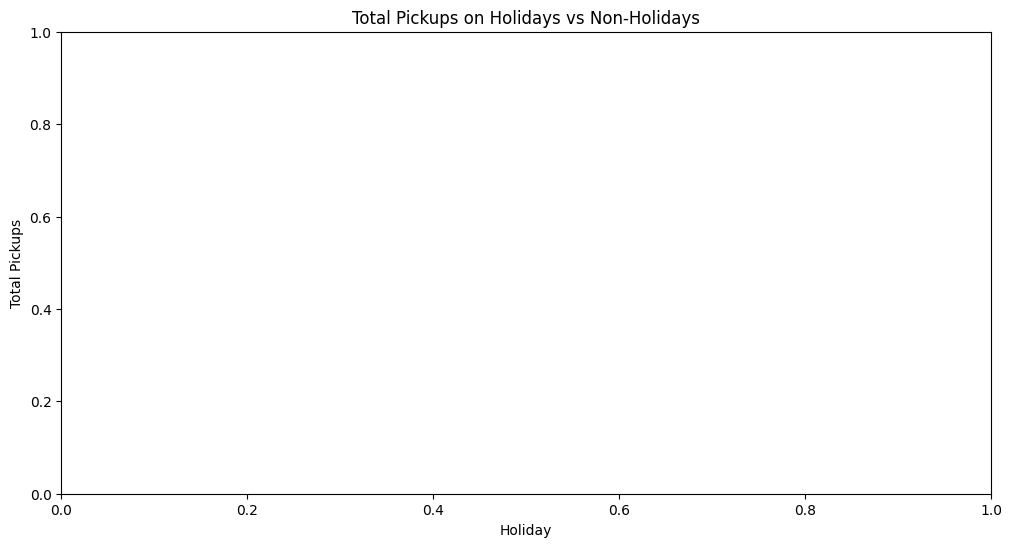

,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd
count,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000
mean,490.215903,5.984924,8.818125,47.669042,30.823065,1017.817938,0.003830,0.026129,0.090464,2.529169
std,995.649536,3.699007,2.442897,19.814969,21.283444,7.768796,0.018933,0.093125,0.219402,4.520325
min,0.000000,0.000000,0.000000,2.000000,-16.000000,991.400000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,9.100000,32.000000,14.000000,1012.500000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,6.000000,10.000000,46.000000,30.000000,1018.200000,0.000000,0.000000,0.000000,0.000000
75%,449.000000,8.000000,10.000000,64.500000,50.000000,1022.900000,0.000000,0.000000,0.050000,2.958333
max,7883.000000,21.000000,10.000000,89.000000,73.000000,1043.400000,0.280000,1.240000,2.100000,19.000000


In [49]:
# Convert pickup_dt to datetime
data['pickup_dt'] = pd.to_datetime(data['pickup_dt'])
data['time_of_day'] = data['pickup_dt'].dt.hour
data['day_of_week'] = data['pickup_dt'].dt.dayofweek

# Calculate total pickups per borough
total_pickups_per_borough = data.groupby('borough')['pickups'].sum().reset_index()

# Calculate average pickups per day for each borough
total_days = data['pickup_dt'].dt.date.nunique()
total_pickups_per_borough['avg_pickups_per_day'] = total_pickups_per_borough['pickups'] / total_days

# Plot total pickups per borough
plt.figure(figsize=(12, 6))
sns.barplot(x='borough', y='pickups', data=total_pickups_per_borough)
plt.title('Total Number of Pickups by Borough')
plt.xlabel('Borough')
plt.ylabel('Total Pickups')
plt.show()

# Plot average pickups per day per borough
plt.figure(figsize=(12, 6))
sns.barplot(x='borough', y='avg_pickups_per_day', data=total_pickups_per_borough)
plt.title('Average Number of Pickups per Day by Borough')
plt.xlabel('Borough')
plt.ylabel('Average Pickups per Day')
plt.show()

# Calculate and plot total pickups for time_of_day
total_pickups_time_of_day = data.groupby('time_of_day')['pickups'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='time_of_day', y='pickups', data=total_pickups_time_of_day)
plt.title('Total Pickups by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Total Pickups')
plt.show()

# Calculate and plot total pickups for day_of_week
total_pickups_day_of_week = data.groupby('day_of_week')['pickups'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='day_of_week', y='pickups', data=total_pickups_day_of_week)
plt.title('Total Pickups by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Pickups')
plt.show()

# Convert 'hday' to numeric: 1 for 'Y', 0 for 'N'
data['hday'] = data['hday'].map({'Y': 1, 'N': 0})

# Calculate and plot total pickups for hday
total_pickups_hday = data.groupby('hday')['pickups'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='hday', y='pickups', data=total_pickups_hday)
plt.title('Total Pickups on Holidays vs Non-Holidays')
plt.xlabel('Holiday')
plt.ylabel('Total Pickups')
plt.show()

# Summary statistics for numerical variables
numerical_vars = ['pickups', 'spd', 'vsb', 'temp', 'dewp', 'slp', 'pcp01', 'pcp06', 'pcp24', 'sd']
summary_stats = data[numerical_vars].describe()

summary_stats

**Data Manipulations**

**Pickups by Boroughs**

In [ ]:
# Make a copy of the data
data_original = data.copy()

# Convert pickup_dt to date
data['pickup_dt'] = pd.to_datetime(data['pickup_dt'])

# Convert hday 'Y' to 1 and 'N' to 0
data['hday'] = data['hday'].map({'N': 0, 'Y': 1})

# Convert the integer column to boolean
#data['hday'] = data['hday'].astype('bool')

# Extract hour from 'pickup_dt'
data['hour'] = data['pickup_dt'].dt.hour

# set time format to military time
data['hour'] = data['hour'].replace(0, 24)
data['hour'].unique()

# Extract day of the week from 'pickup_dt'
data['day_of_week'] = data['pickup_dt'].dt.dayofweek

# List of boroughs
boroughs = data['borough'].dropna().unique()

0        1
1        1
2        1
3        1
4        1
        ..
29096    0
29097    0
29098    0
29099    0
29100    0
Name: hday, Length: 29101, dtype: int64


Determine what the total number of pickups was for an undefined borough and determine if the missing data is statistically significant

In [ ]:
# Get pickups by location
data.groupby('borough')['pickups'].sum()

for loc in boroughs:
  data[loc] = data[data['borough'] == loc]['pickups'].sum()

# Count the number of rows with borough = nan
undefined_boroughs_count = data['borough'].isnull().sum()
undefined_boroughs_count

# Filter rows where borough is nan
undefined_boroughs = data[data['borough'].isnull()]

# Count the total number of pickups in rows with undefined boroughs
total_pickups_undefined_boroughs = undefined_boroughs['pickups'].sum()
total_pickups_undefined_boroughs

# Group by borough and sum the pickups
pickups_per_borough = data.groupby('borough')['pickups'].sum()

# Calculate total pickups for undefined boroughs
total_pickups_undefined_boroughs = data[data['borough'].isnull()]['pickups'].sum()

# Append the undefined boroughs data
pickups_per_borough['Undefined'] = total_pickups_undefined_boroughs
pickups_per_borough

# Calculate the total number of pickups across all boroughs
total_pickups_all_boroughs = data['pickups'].sum()

# Percent of total pckups without a borough
proportion_undefined = round((total_pickups_undefined_boroughs / total_pickups_all_boroughs)*100,2)
print(f"Percent of total pickups without a borough: {proportion_undefined}%")

# determine proportion of pickups by location
data.groupby('borough')['pickups'].sum()/data['pickups'].sum()

# Calculate the proportions of pickups by burough and create an array
proportion_pickups_per_borough = round((data.groupby('borough')['pickups'].sum() / data['pickups'].sum()) * 100, 2)
proportion_pickups_per_borough

# Append proportion_undefined
proportion_pickups_per_borough['Undefined'] = proportion_undefined
proportion_pickups_per_borough

Percent of total pickups without a borough: 0.04%


borough
Bronx             1.54
Brooklyn         16.27
EWR               0.00
Manhattan        72.68
Queens            9.42
Staten Island     0.05
Undefined         0.04
Name: pickups, dtype: float64



---


***Statistically the unknows are significant, especially in relation to EWR and State Island - this presents an issue***


---



**Pickups by Date**

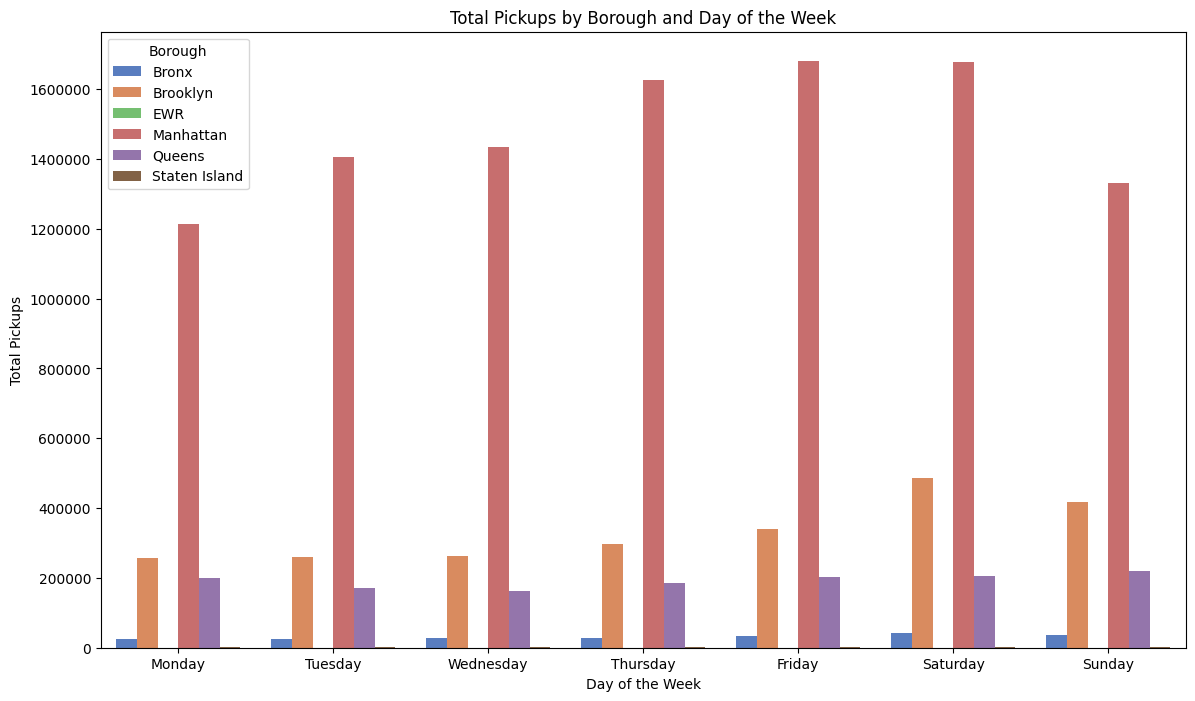

In [ ]:
# Calculate the total pickups per borough and day of the week
pickups_by_day_borough = data.groupby(['day_of_week', 'borough'])['pickups'].sum().reset_index()

# Replace day_of_week numbers with day names
days = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
pickups_by_day_borough['day_of_week'] = pickups_by_day_borough['day_of_week'].map(days)

# Convert datetime to ordinal format for correlation calculation
data['pickup_ordinal'] = data['pickup_dt'].apply(lambda x: x.toordinal())

# Create the plot
plt.figure(figsize=(14, 8))
sns.barplot(data=pickups_by_day_borough, x='day_of_week', y='pickups', hue='borough', palette='muted')

plt.title('Total Pickups by Borough and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Pickups')
plt.legend(title='Borough')
plt.ticklabel_format(style='plain', axis='y')  # Suppress scientific notation on y-axis
plt.show()

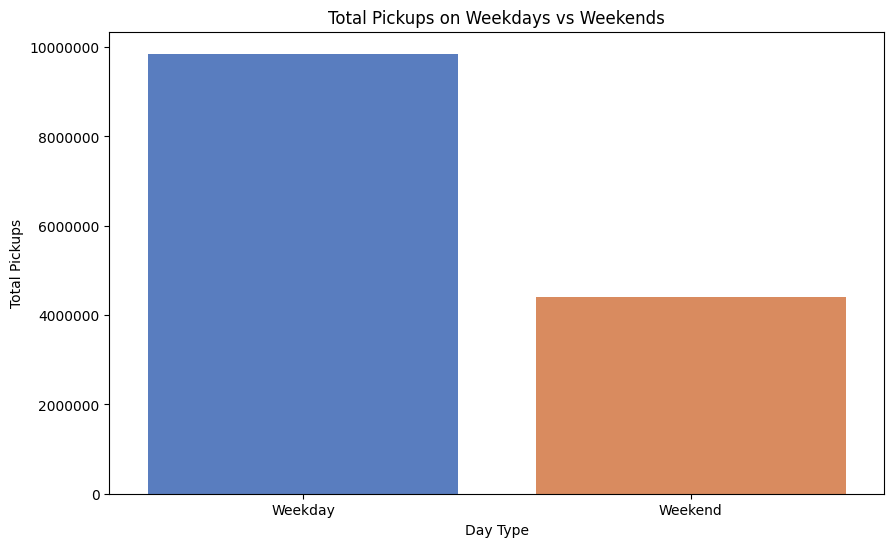

In [ ]:
# lets look at weekday vs weekend company wide

# Create a weekend/weekday indicator
data['is_weekend'] = data['day_of_week'].isin([5, 6]).astype(int)  # 5: Saturday, 6: Sunday

# Analysis of total pickups on weekdays vs weekends regardless of borough
total_pickups_weekday_vs_weekend = data.groupby('is_weekend')['pickups'].sum().reset_index()
total_pickups_weekday_vs_weekend['day_type'] = total_pickups_weekday_vs_weekend['is_weekend'].map({0: 'Weekday', 1: 'Weekend'})

# Analysis of total pickups on weekdays vs weekends regardless of borough
total_pickups_weekday_vs_weekend = data.groupby('is_weekend')['pickups'].sum().reset_index()
total_pickups_weekday_vs_weekend['day_type'] = total_pickups_weekday_vs_weekend['is_weekend'].map({0: 'Weekday', 1: 'Weekend'})

# Plotting total pickups on weekdays vs weekends regardless of borough
plt.figure(figsize=(10, 6))
sns.barplot(data=total_pickups_weekday_vs_weekend, x='day_type', y='pickups', hue='day_type', palette='muted')
plt.title('Total Pickups on Weekdays vs Weekends')
plt.xlabel('Day Type')
plt.ylabel('Total Pickups')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

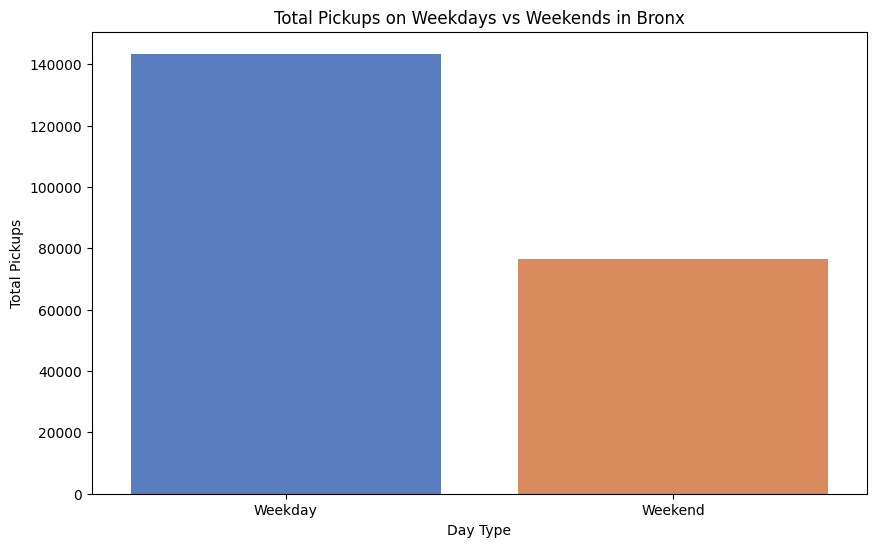

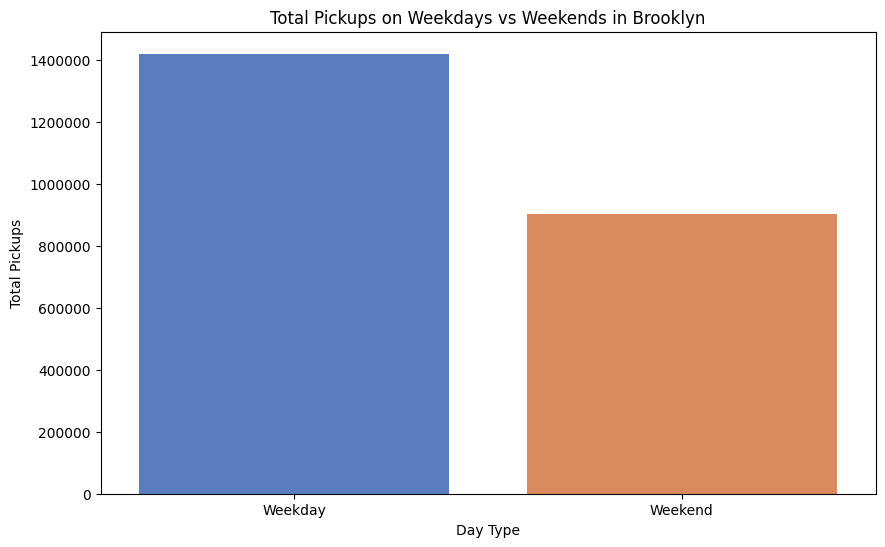

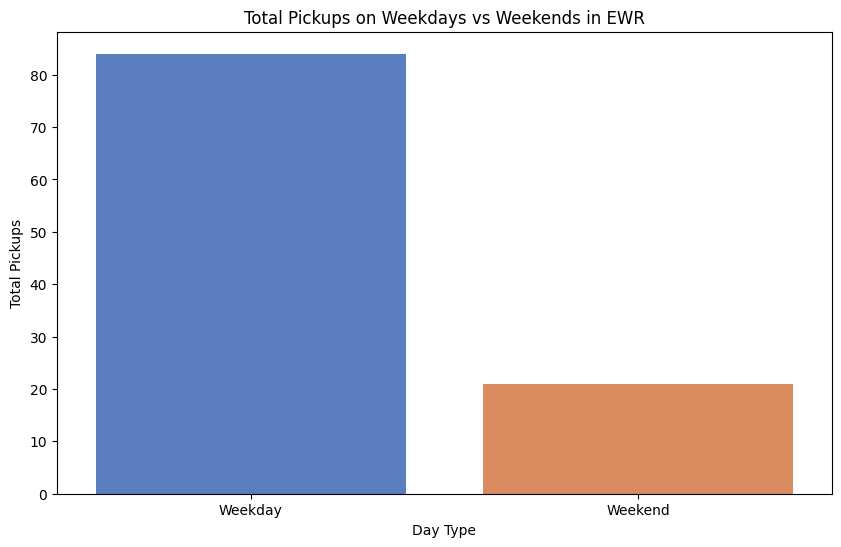

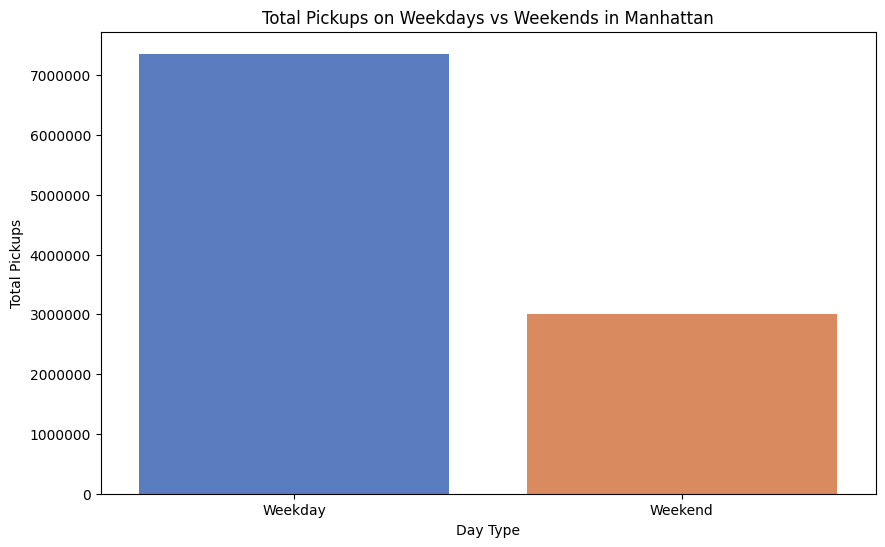

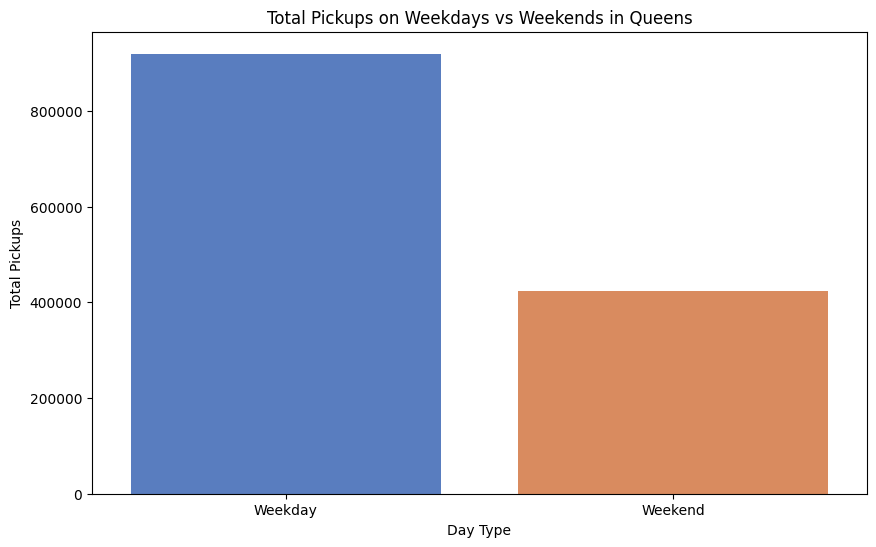

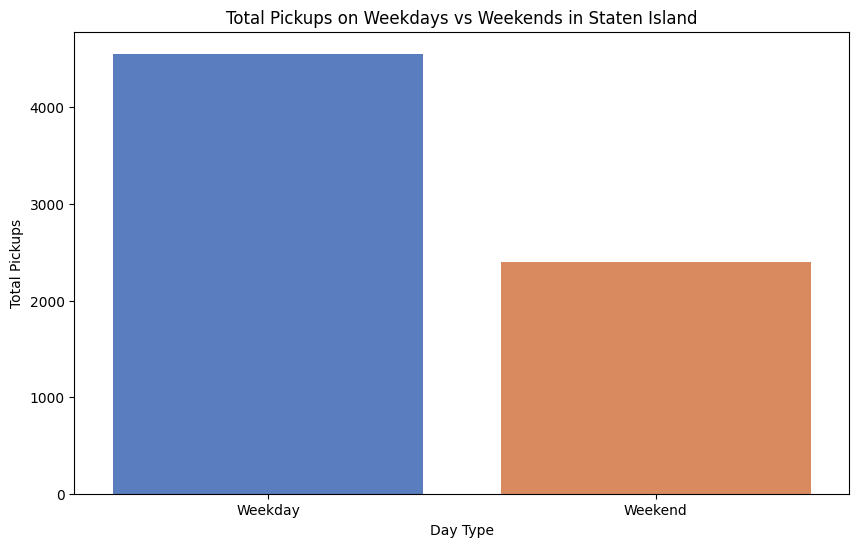

In [ ]:
# Analysis of total pickups on weekdays vs weekends by borough

total_pickups_by_borough_and_day_type = data.groupby(['borough', 'is_weekend'])['pickups'].sum().reset_index()
total_pickups_by_borough_and_day_type['day_type'] = total_pickups_by_borough_and_day_type['is_weekend'].map({0: 'Weekday', 1: 'Weekend'})

# Convert datetime to ordinal format for correlation calculation
data['pickup_ordinal'] = data['pickup_dt'].apply(lambda x: x.toordinal())

# Plotting total pickups on weekdays vs weekends by borough
for borough in boroughs:
    plt.figure(figsize=(10, 6))
    borough_data = total_pickups_by_borough_and_day_type[total_pickups_by_borough_and_day_type['borough'] == borough]
    sns.barplot(data=borough_data, x='day_type', y='pickups', hue='day_type', palette='muted')
    plt.title(f'Total Pickups on Weekdays vs Weekends in {borough}')
    plt.xlabel('Day Type')
    plt.ylabel('Total Pickups')
    plt.ticklabel_format(style='plain', axis='y')  # Suppress scientific notation on y-axis
    plt.show()

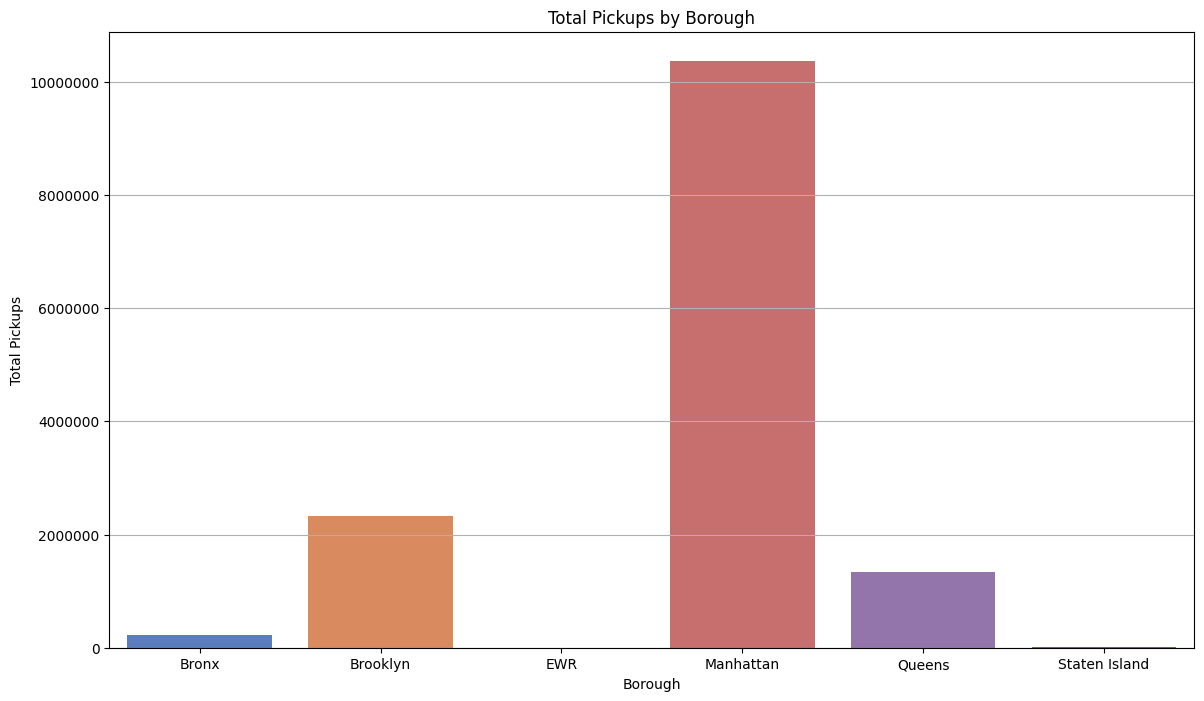

In [ ]:
# Suppress FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Calculate the total pickups per borough
total_pickups_borough = data.groupby('borough')['pickups'].sum().reset_index()

# Plot total pickups by borough using bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='borough', y='pickups', data=total_pickups_borough, palette='muted')

plt.title('Total Pickups by Borough')
plt.xlabel('Borough')
plt.ylabel('Total Pickups')
plt.grid(True, axis='y')
plt.ticklabel_format(style='plain', axis='y')  # Suppress scientific notation on y-axis
plt.show()

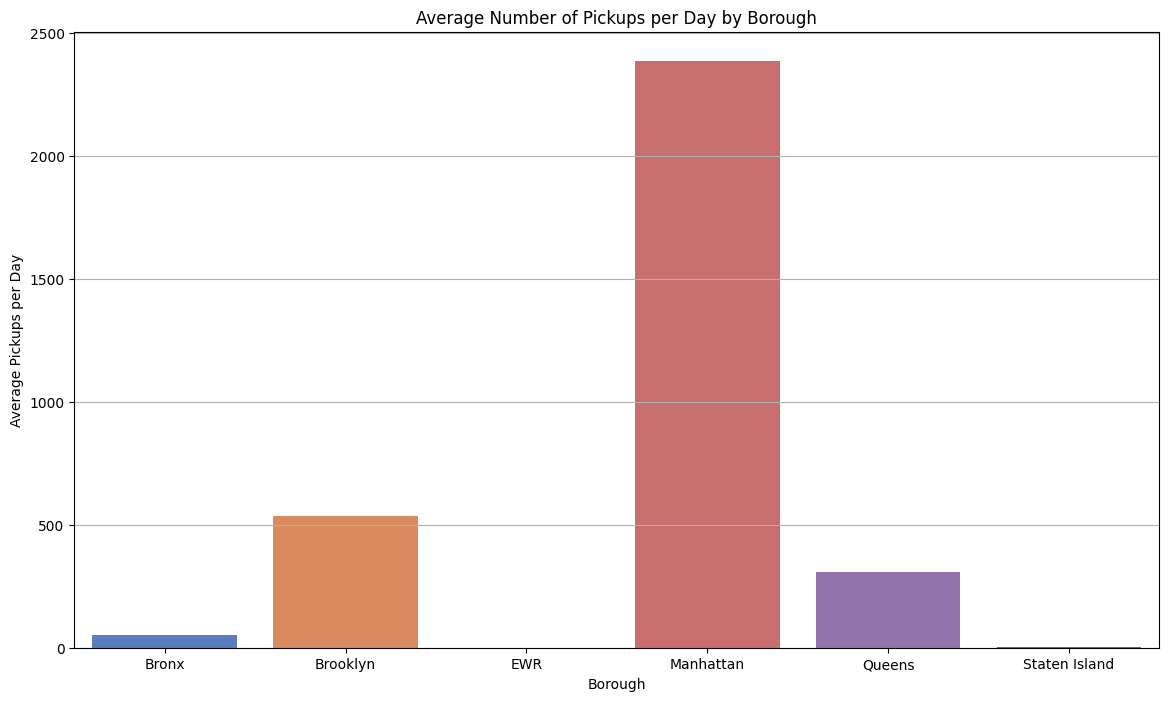

In [ ]:
# Calculate the avg number of pickups per day by borough

# Calculate the total pickups per borough
total_pickups_borough = data.groupby('borough')['pickups'].sum().reset_index()

# Calculate the number of days in the dataset
total_days = data['pickup_dt'].nunique()

# Calculate the average pickups per day for each borough
total_pickups_borough['avg_pickups_per_day'] = total_pickups_borough['pickups'] / total_days

# Plot average pickups per day by borough using bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='borough', y='avg_pickups_per_day', data=total_pickups_borough, palette='muted')

plt.title('Average Number of Pickups per Day by Borough')
plt.xlabel('Borough')
plt.ylabel('Average Pickups per Day')
plt.grid(True, axis='y')
plt.ticklabel_format(style='plain', axis='y')  # Suppress scientific notation on y-axis
plt.show()

**Pickups by Time of Day**

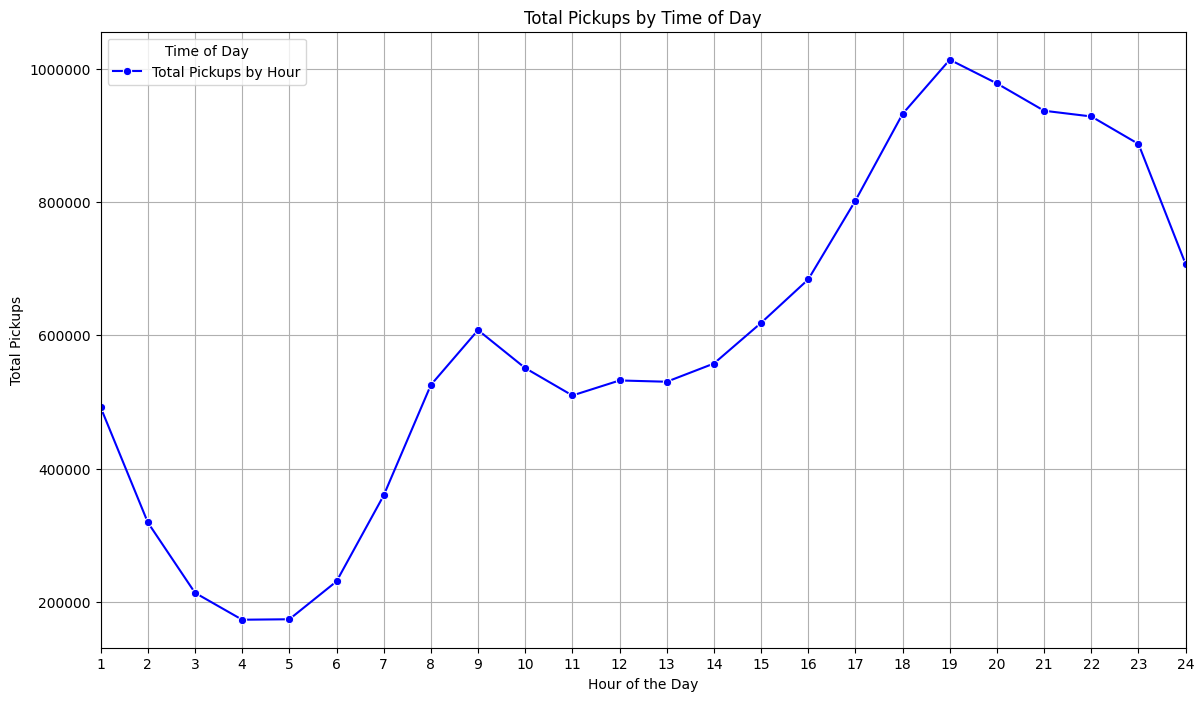

In [ ]:
# Calculate the total pickups per hour of the day
total_pickups_hour = data.groupby('hour')['pickups'].sum().reset_index()

# Plot pickups vs time of day using line plot
plt.figure(figsize=(14, 8))
sns.lineplot(x='hour', y='pickups', data=total_pickups_hour, marker='o', label='Total Pickups by Hour', color='blue')

plt.title('Total Pickups by Time of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Pickups')
plt.grid(True)
plt.ticklabel_format(style='plain', axis='y')  # Suppress scientific notation on y-axis
plt.legend(title='Time of Day')
plt.xlim(1, 24)
plt.xticks(range(1, 25))
plt.show()

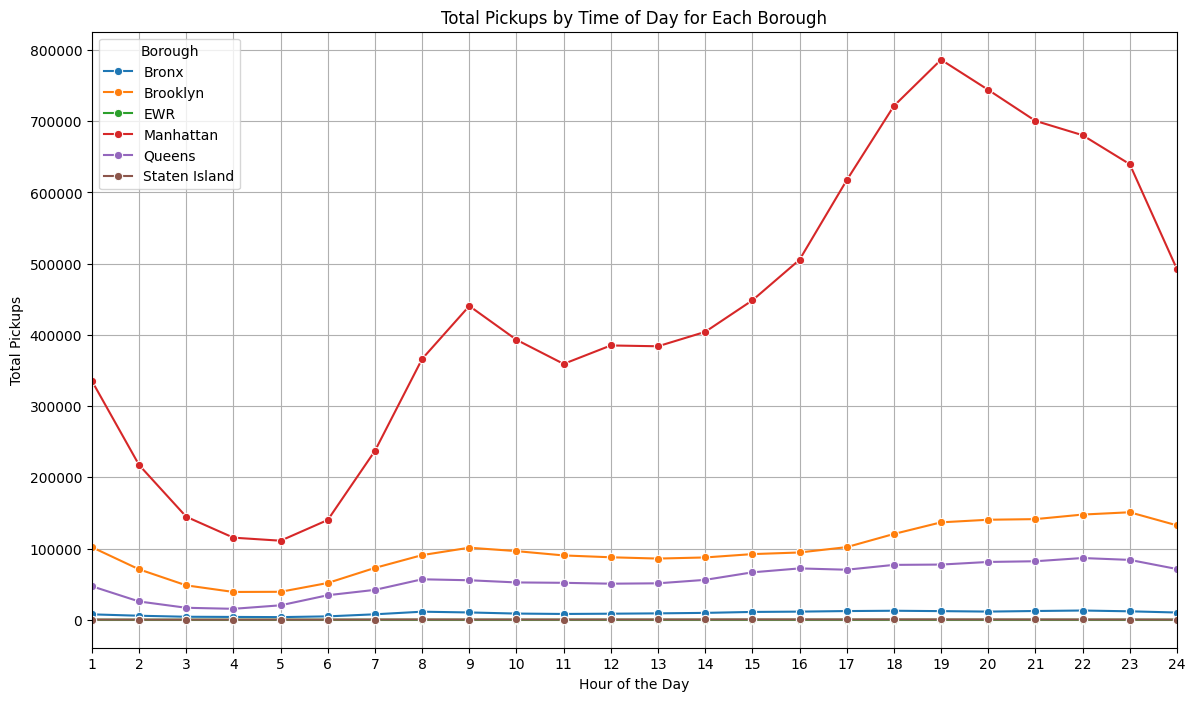

In [ ]:
# Calculate the total pickups per hour of the day for each borough
total_pickups_hour_borough = data.groupby(['hour', 'borough'])['pickups'].sum().reset_index()

# Plot pickups vs time of day for each borough using line plots
plt.figure(figsize=(14, 8))
sns.lineplot(x='hour', y='pickups', hue='borough', data=total_pickups_hour_borough, marker='o')

plt.title('Total Pickups by Time of Day for Each Borough')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Pickups')
plt.grid(True)
plt.ticklabel_format(style='plain', axis='y')  # Suppress scientific notation on y-axis
plt.legend(title='Borough')
plt.xlim(1, 24)
plt.xticks(range(1, 25))
plt.show()

**Pickups by Windspeed**

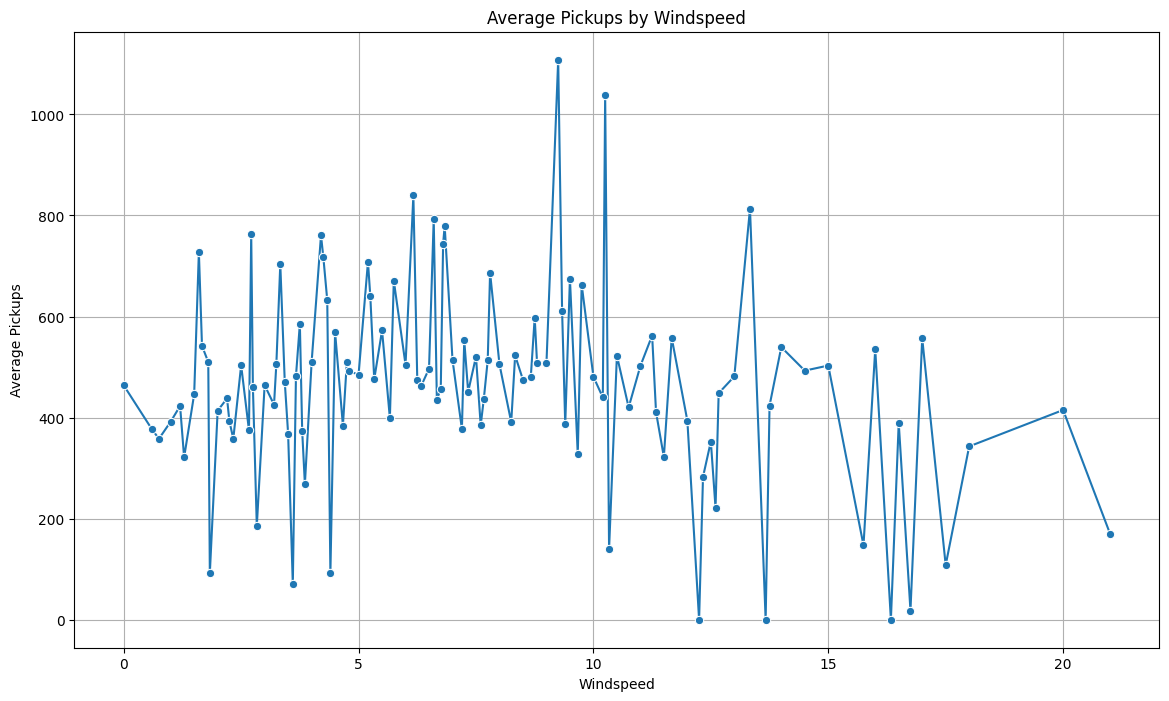

In [ ]:
# Calculate the average pickups per windspeed value
average_pickups_windspeed = data.groupby('spd')['pickups'].mean().reset_index()

# Plot pickups vs windspeed using a line graph
plt.figure(figsize=(14, 8))
sns.lineplot(x='spd', y='pickups', data=average_pickups_windspeed, marker='o')
plt.title('Average Pickups by Windspeed')
plt.xlabel('Windspeed')
plt.ylabel('Average Pickups')
plt.grid(True)
plt.ticklabel_format(style='plain', axis='y')  # Suppress scientific notation on y-axis
plt.show()


**Pickups by Visibility**

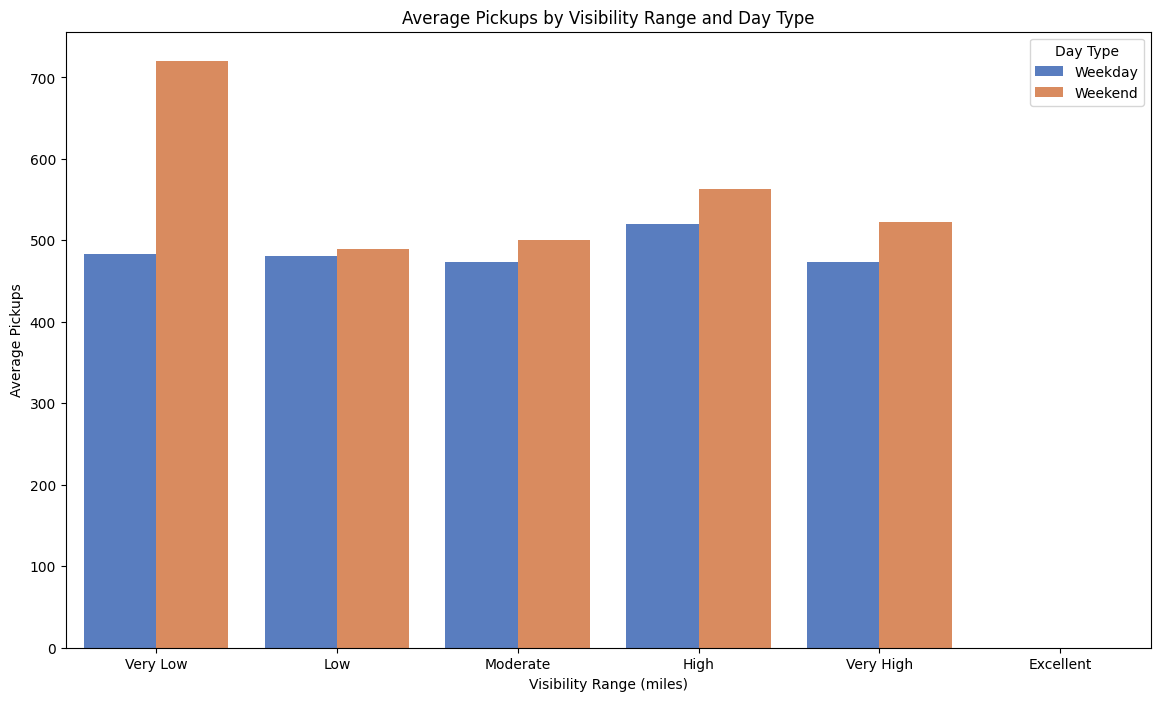

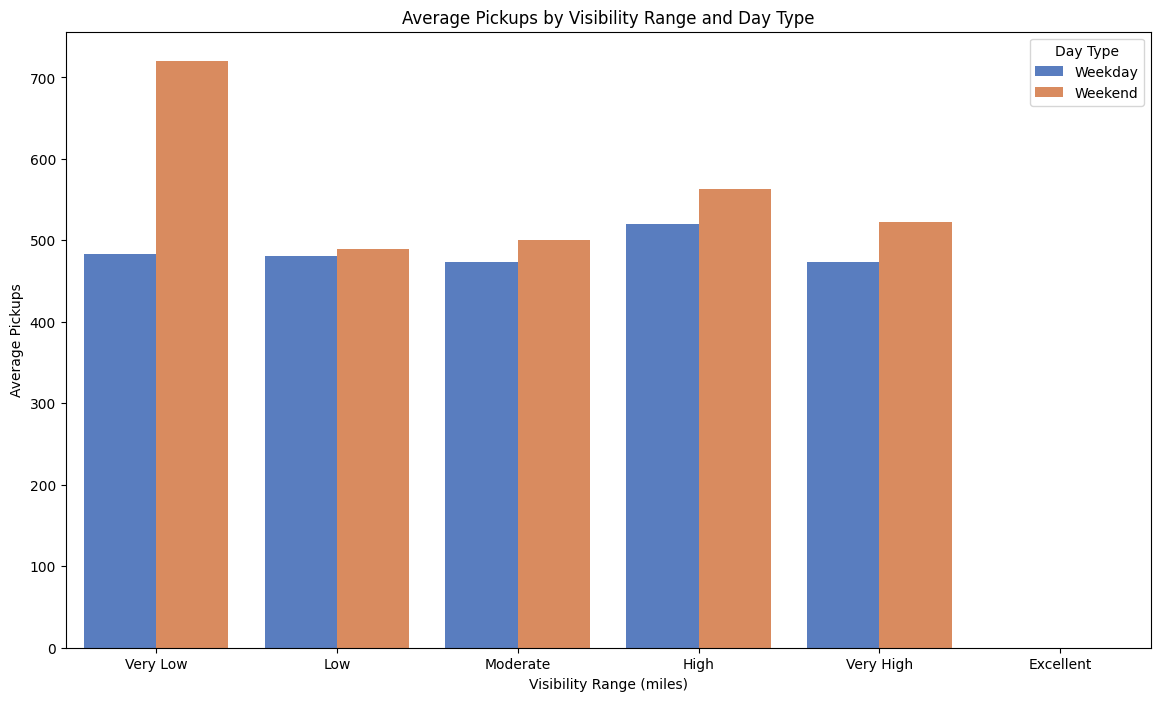

In [ ]:
# Categorize visibility into ranges
data['visibility_range'] = pd.cut(data['vsb'], bins=[-float('inf'), 1, 3, 5, 7, 10, float('inf')],
                                  labels=['Very Low', 'Low', 'Moderate', 'High', 'Very High', 'Excellent'])

# Calculate average pickups for each visibility range on weekdays and weekends
avg_pickups_by_visibility = data.groupby(['visibility_range', 'is_weekend'])['pickups'].mean().reset_index()
avg_pickups_by_visibility['day_type'] = avg_pickups_by_visibility['is_weekend'].map({0: 'Weekday', 1: 'Weekend'})

# Plotting average pickups by visibility range
plt.figure(figsize=(14, 8))
sns.barplot(data=avg_pickups_by_visibility, x='visibility_range', y='pickups', hue='day_type', palette='muted')
plt.title('Average Pickups by Visibility Range and Day Type')
plt.xlabel('Visibility Range (miles)')
plt.ylabel('Average Pickups')
plt.ticklabel_format(style='plain', axis='y')  # Suppress scientific notation on y-axis
plt.legend(title='Day Type')
plt.show()

# Categorize visibility into ranges
data['visibility_range'] = pd.cut(data['vsb'], bins=[-float('inf'), 1, 3, 5, 7, 10, float('inf')],
                                  labels=['Very Low', 'Low', 'Moderate', 'High', 'Very High', 'Excellent'])

# Calculate average pickups for each visibility range on weekdays and weekends
avg_pickups_by_visibility = data.groupby(['visibility_range', 'is_weekend'])['pickups'].mean().reset_index()
avg_pickups_by_visibility['day_type'] = avg_pickups_by_visibility['is_weekend'].map({0: 'Weekday', 1: 'Weekend'})

# Plotting average pickups by visibility range
plt.figure(figsize=(14, 8))
sns.barplot(data=avg_pickups_by_visibility, x='visibility_range', y='pickups', hue='day_type', palette='muted')
plt.title('Average Pickups by Visibility Range and Day Type')
plt.xlabel('Visibility Range (miles)')
plt.ylabel('Average Pickups')
plt.ticklabel_format(style='plain', axis='y')  # Suppress scientific notation on y-axis
plt.legend(title='Day Type')
plt.show()

**Pickups by Temperature**

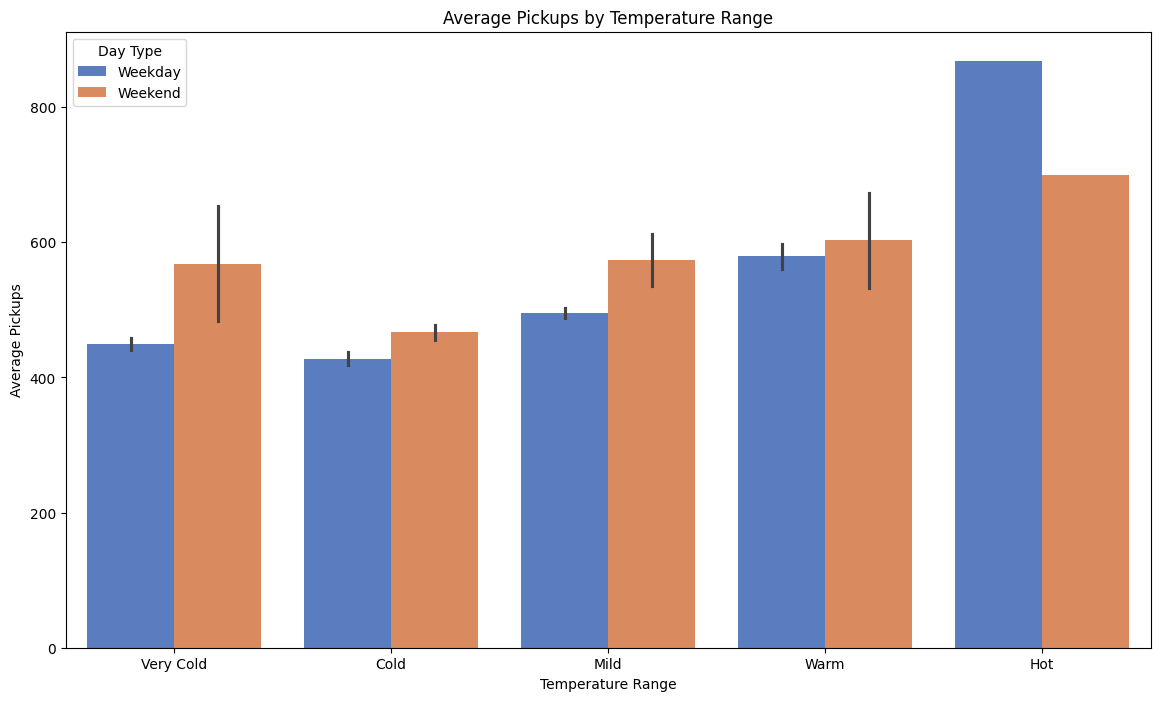

In [ ]:
# Lets examine the role weather has to play

# Define weather conditions
# For simplicity, we'll define temperature ranges and precipitation presence
data['temp_range'] = pd.cut(data['temp'], bins=[-float('inf'), 32, 50, 70, 85, float('inf')],
                            labels=['Very Cold', 'Cold', 'Mild', 'Warm', 'Hot'])
data['precipitation'] = data['pcp01'].apply(lambda x: 'No' if x == 0 else 'Yes')

# Calculate average pickups for each weather condition on weekdays and weekends
avg_pickups_by_weather = data.groupby(['temp_range', 'precipitation', 'is_weekend'])['pickups'].mean().reset_index()
avg_pickups_by_weather['day_type'] = avg_pickups_by_weather['is_weekend'].map({0: 'Weekday', 1: 'Weekend'})

# Plotting average pickups by temperature range and precipitation
plt.figure(figsize=(14, 8))
sns.barplot(data=avg_pickups_by_weather, x='temp_range', y='pickups', hue='day_type', palette='muted')
plt.title('Average Pickups by Temperature Range')
plt.xlabel('Temperature Range')
plt.ylabel('Average Pickups')
plt.legend(title='Day Type')
plt.show()

**Pickups by Dew Point**

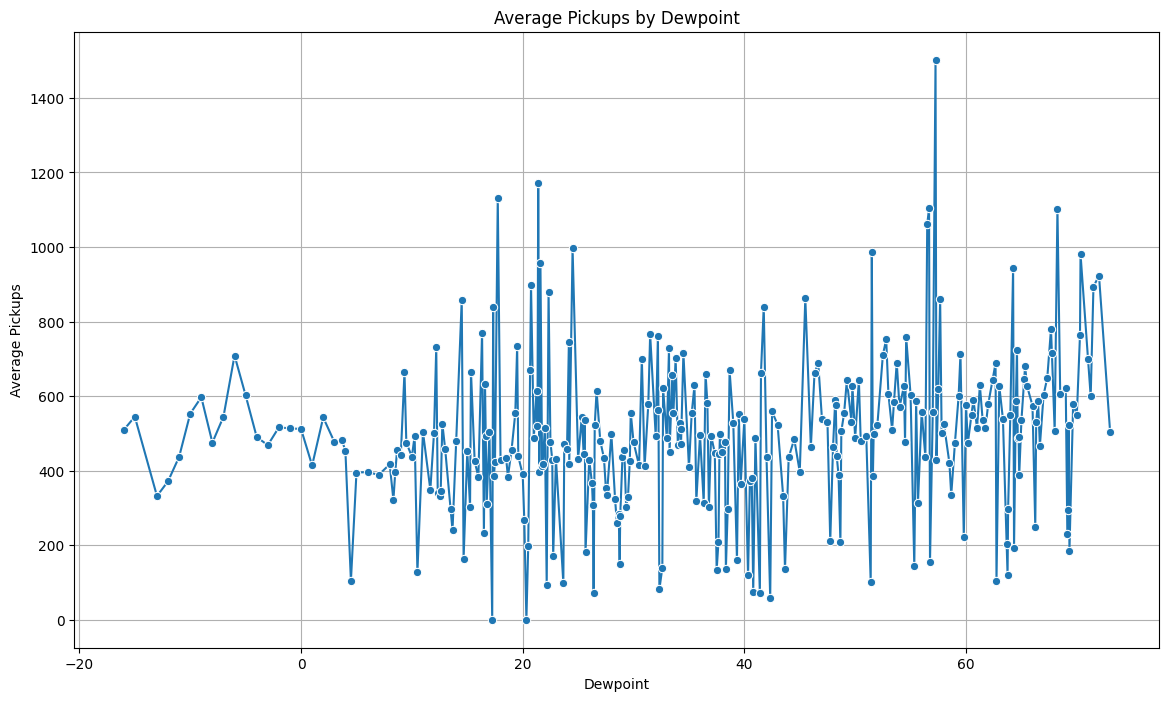

In [ ]:
# Calculate the average pickups per dewpoint value
average_pickups_dewp = data.groupby('dewp')['pickups'].mean().reset_index()

# Plot pickups vs dewpoint using a line graph
plt.figure(figsize=(14, 8))
sns.lineplot(x='dewp', y='pickups', data=average_pickups_dewp, marker='o')
plt.title('Average Pickups by Dewpoint')
plt.xlabel('Dewpoint')
plt.ylabel('Average Pickups')
plt.grid(True)
plt.ticklabel_format(style='plain', axis='y')  # Suppress scientific notation on y-axis
plt.show()

**Pickups by Pressure**

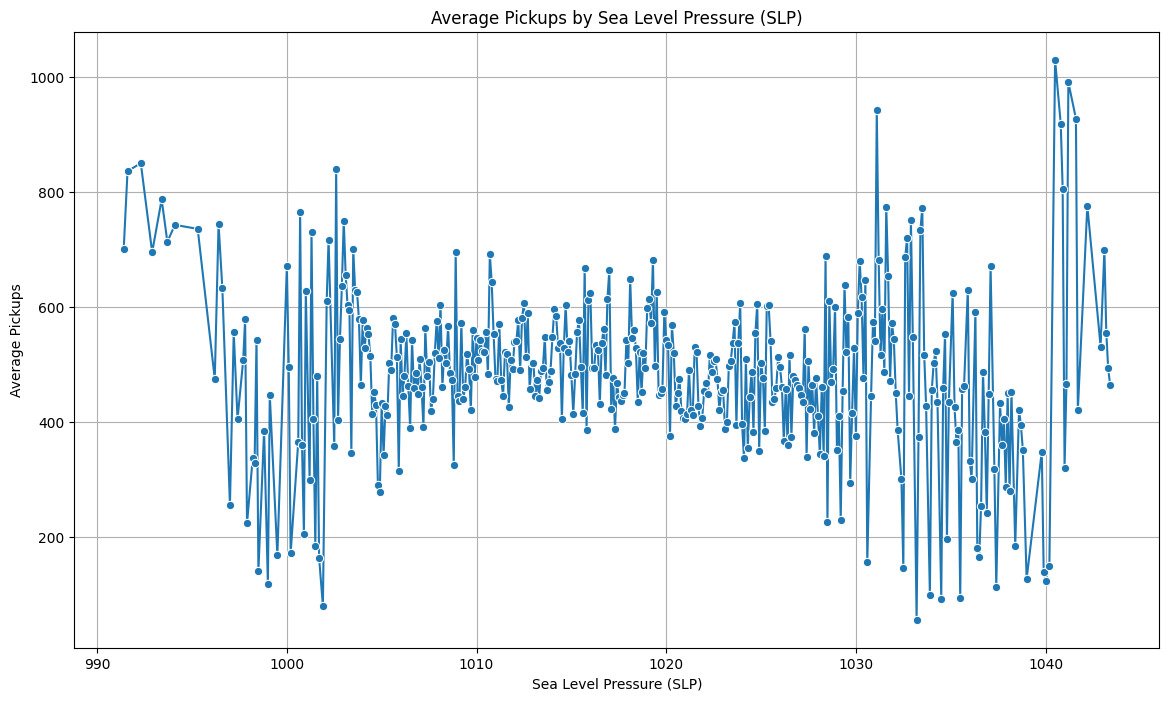

In [ ]:
# Calculate the average pickups per SLP value
average_pickups_slp = data.groupby('slp')['pickups'].mean().reset_index()

# Plot pickups vs SLP using a line graph
plt.figure(figsize=(14, 8))
sns.lineplot(x='slp', y='pickups', data=average_pickups_slp, marker='o')
plt.title('Average Pickups by Sea Level Pressure (SLP)')
plt.xlabel('Sea Level Pressure (SLP)')
plt.ylabel('Average Pickups')
plt.grid(True)
plt.ticklabel_format(style='plain', axis='y')  # Suppress scientific notation on y-axis
plt.show()

**Pickups by Precipitation**

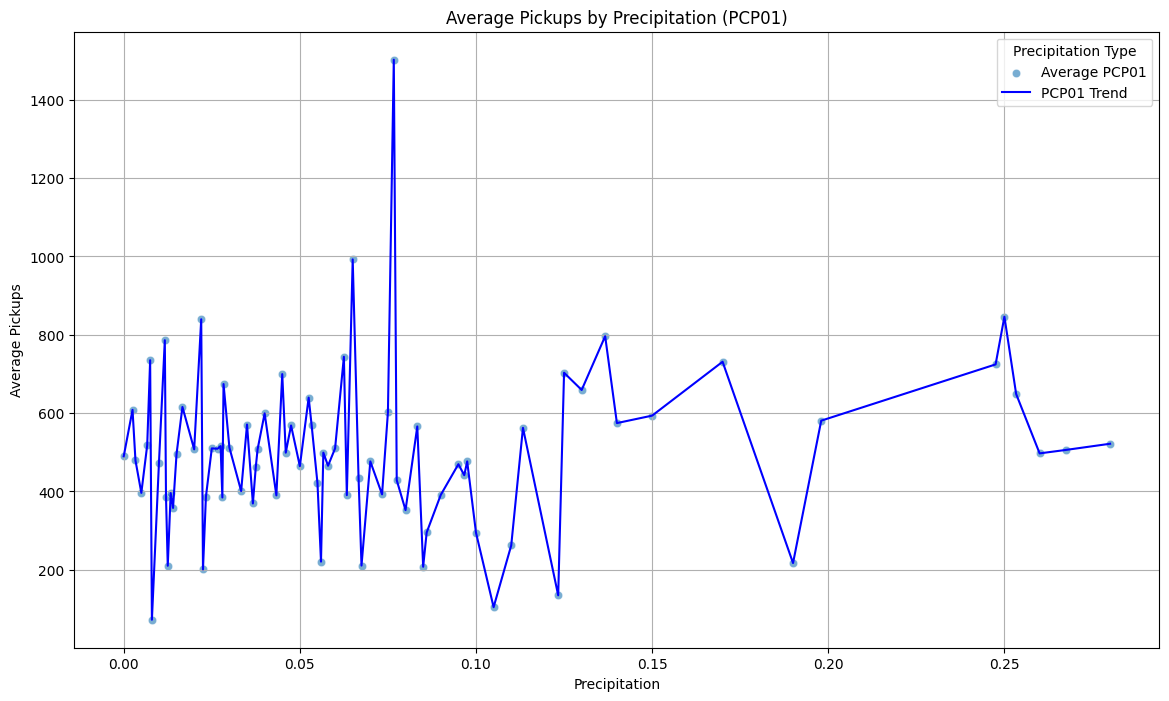

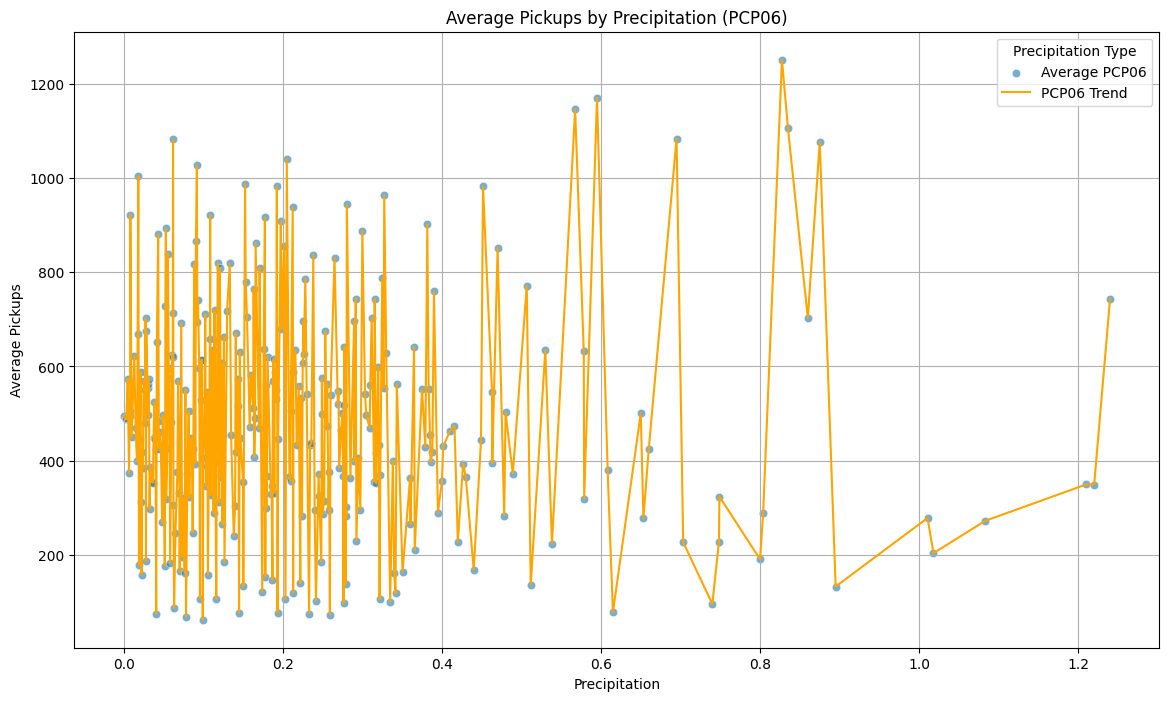

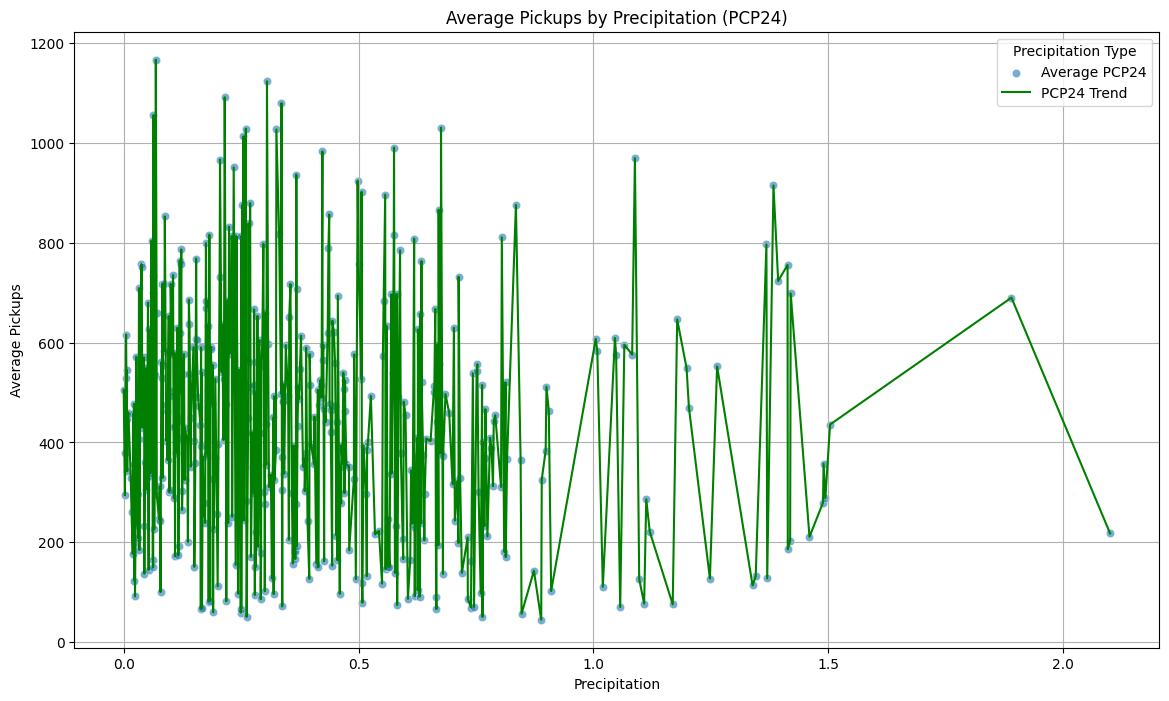

In [ ]:
# Calculate the average pickups per pcp01, pcp06, and pcp24 values
average_pickups_pcp01 = data.groupby('pcp01')['pickups'].mean().reset_index()
average_pickups_pcp06 = data.groupby('pcp06')['pickups'].mean().reset_index()
average_pickups_pcp24 = data.groupby('pcp24')['pickups'].mean().reset_index()

# Plot pickups vs pcp01 using scatter plots
plt.figure(figsize=(14, 8))
sns.scatterplot(x='pcp01', y='pickups', data=average_pickups_pcp01, label='Average PCP01', alpha=0.6)
sns.lineplot(x='pcp01', y='pickups', data=average_pickups_pcp01, label='PCP01 Trend', color='blue')
plt.title('Average Pickups by Precipitation (PCP01)')
plt.xlabel('Precipitation')
plt.ylabel('Average Pickups')
plt.grid(True)
plt.ticklabel_format(style='plain', axis='y')  # Suppress scientific notation on y-axis
plt.legend(title='Precipitation Type')
plt.show()

# Plot pickups vs pcp06 using scatter plots
plt.figure(figsize=(14, 8))
sns.scatterplot(x='pcp06', y='pickups', data=average_pickups_pcp06, label='Average PCP06', alpha=0.6)
sns.lineplot(x='pcp06', y='pickups', data=average_pickups_pcp06, label='PCP06 Trend', color='orange')
plt.title('Average Pickups by Precipitation (PCP06)')
plt.xlabel('Precipitation')
plt.ylabel('Average Pickups')
plt.grid(True)
plt.ticklabel_format(style='plain', axis='y')  # Suppress scientific notation on y-axis
plt.legend(title='Precipitation Type')
plt.show()

# Plot pickups vs pcp24 using scatter plots
plt.figure(figsize=(14, 8))
sns.scatterplot(x='pcp24', y='pickups', data=average_pickups_pcp24, label='Average PCP24', alpha=0.6)
sns.lineplot(x='pcp24', y='pickups', data=average_pickups_pcp24, label='PCP24 Trend', color='green')
plt.title('Average Pickups by Precipitation (PCP24)')
plt.xlabel('Precipitation')
plt.ylabel('Average Pickups')
plt.grid(True)
plt.ticklabel_format(style='plain', axis='y')  # Suppress scientific notation on y-axis
plt.legend(title='Precipitation Type')
plt.show()

**Pickups by Snow Depth**

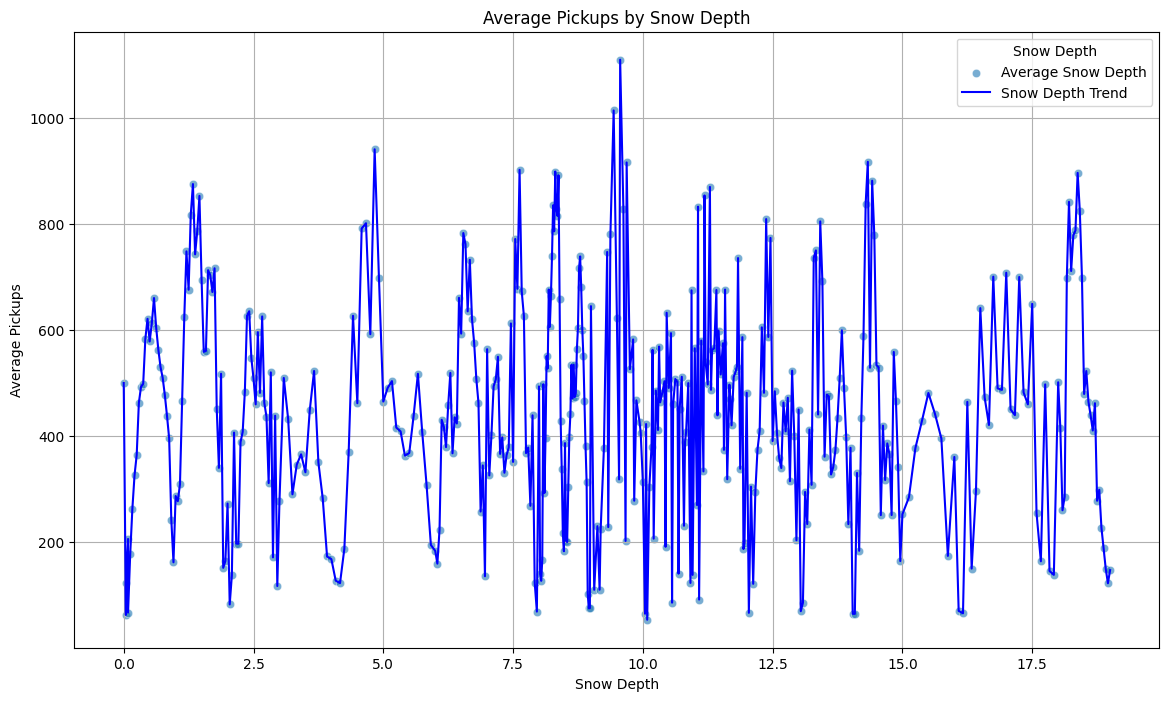

In [ ]:
# Calculate the average pickups per snow depth value
average_pickups_snow_depth = data.groupby('sd')['pickups'].mean().reset_index()

# Plot pickups vs snow depth using scatter plots
plt.figure(figsize=(14, 8))
sns.scatterplot(x='sd', y='pickups', data=average_pickups_snow_depth, label='Average Snow Depth', alpha=0.6)
sns.lineplot(x='sd', y='pickups', data=average_pickups_snow_depth, label='Snow Depth Trend', color='blue')
plt.title('Average Pickups by Snow Depth')
plt.xlabel('Snow Depth')
plt.ylabel('Average Pickups')
plt.grid(True)
plt.ticklabel_format(style='plain', axis='y')  # Suppress scientific notation on y-axis
plt.legend(title='Snow Depth')
plt.show()

**Pickups by Holiday or Non-Holiday**

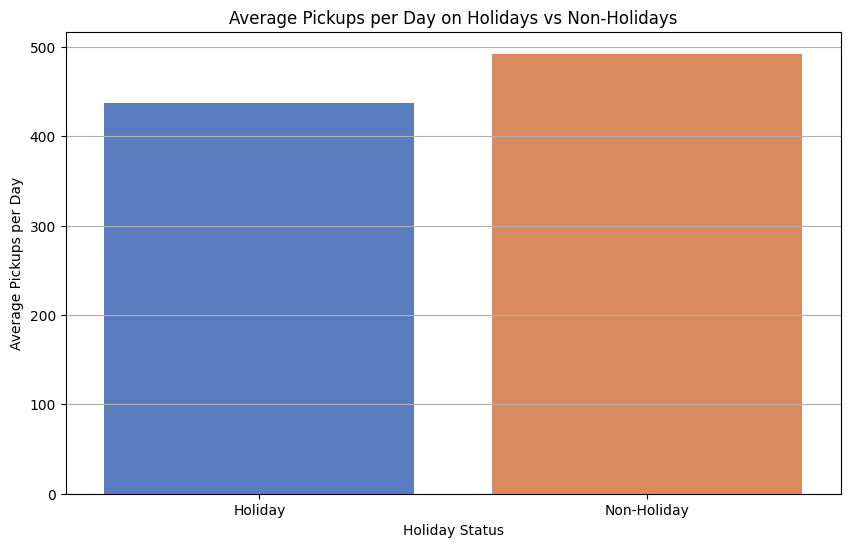

In [ ]:
# Calculate the total number of holiday and non-holiday days
total_holiday_days = data['hday'].sum()
total_non_holiday_days = len(data) - total_holiday_days

# Count the number of pickups when data['hday] = 1
pickups_on_holidays = data[data['hday'] == 1]['pickups'].sum()

# Count the number of pickups when data['hday] = 0
pickups_on_non_holidays = data[data['hday'] == 0]['pickups'].sum()

# Calculate average pickups per day
average_pickups_holiday = pickups_on_holidays / total_holiday_days
average_pickups_non_holiday = pickups_on_non_holidays / total_non_holiday_days

# Create a DataFrame for plotting
average_pickups_holiday_vs_nonholiday = pd.DataFrame({
    'hday': ['Holiday', 'Non-Holiday'],
    'average_pickups': [average_pickups_holiday, average_pickups_non_holiday]
})

# Suppress FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Plot normalized pickups vs holiday status using bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='hday', y='average_pickups', data=average_pickups_holiday_vs_nonholiday, palette='muted')

plt.title('Average Pickups per Day on Holidays vs Non-Holidays')
plt.xlabel('Holiday Status')
plt.ylabel('Average Pickups per Day')
plt.grid(True, axis='y')
plt.ticklabel_format(style='plain', axis='y')  # Suppress scientific notation on y-axis
plt.show()


**Correlations and Conclusions**

It is obvious location plays the biggest part in determning the number of pickups a day.

In [ ]:
# Calculate the total pickups per day
total_pickups_per_day = data.groupby(data['pickup_dt'].dt.date)['pickups'].sum().reset_index(name='total_pickups_per_day')

# Calculate the total pickups per borough
total_pickups_borough = data.groupby('borough')['pickups'].sum().reset_index()

# Calculate the number of days in the dataset
total_days = data['pickup_dt'].nunique()

# Calculate the average pickups per day for each borough
total_pickups_borough['avg_pickups_per_day'] = total_pickups_borough['pickups'] / total_days

# Merge total pickups per day with total pickups per borough
merged_data = pd.merge(data, total_pickups_borough[['borough', 'avg_pickups_per_day']], on='borough', how='left')

# Calculate total pickups per day by borough
total_pickups_per_day_borough = merged_data.groupby(['pickup_dt', 'borough'])['pickups'].sum().reset_index()

# Merge with average pickups per day by borough
total_pickups_per_day_borough = pd.merge(total_pickups_per_day_borough, total_pickups_borough[['borough', 'avg_pickups_per_day']], on='borough', how='left')

# Calculate the correlation between total pickups per day and average pickups per day by borough
correlation = total_pickups_per_day_borough['pickups'].corr(total_pickups_per_day_borough['avg_pickups_per_day'])
print("Correlation between total pickups per day and average pickups per day by borough:", correlation)

Correlation between total pickups per day and average pickups per day by borough: 0.81481483249621


Correlations by the numbers:

In [40]:
# Day of the week
# Ensure 'day_of_week' is correctly extracted from 'pickup_dt'
data['day_of_week'] = data['pickup_dt'].dt.dayofweek

# Calculate the total pickups per day of the week
total_pickups_per_day_of_week = data.groupby('day_of_week')['pickups'].sum().reset_index()

# Calculate the correlation between day of the week and pickups
correlation_day_of_week_pickups = total_pickups_per_day_of_week['day_of_week'].corr(total_pickups_per_day_of_week['pickups'])
correlation_day_of_week_pickups = round(correlation_day_of_week_pickups, 4)
print("Correlation between day of the week and pickups:", correlation_day_of_week_pickups)

# Time of day
# Calculate the total pickups per hour of the day
total_pickups_per_hour = data.groupby('hour')['pickups'].sum().reset_index()

# Calculate the correlation between hour of the day and pickups
correlation_hour_pickups = total_pickups_per_hour['hour'].corr(total_pickups_per_hour['pickups'])

# Round the correlation value to 4 decimal places
correlation_hour_pickups_rounded = round(correlation_hour_pickups, 4)
print("Correlation between hour of the day and pickups:", correlation_hour_pickups_rounded)

# Wind speed
# Calculate the total pickups per wind speed
total_pickups_per_wind_speed = data.groupby('spd')['pickups'].sum().reset_index()

# Calculate the correlation between wind speed and pickups
correlation_wind_speed_pickups = total_pickups_per_wind_speed['spd'].corr(total_pickups_per_wind_speed['pickups'])

# Round the correlation value to 4 decimal places
correlation_wind_speed_pickups_rounded = round(correlation_wind_speed_pickups, 4)
print("Correlation between wind speed and pickups:", correlation_wind_speed_pickups_rounded)

# Visibility
# Calculate the total pickups per visibility
total_pickups_per_visibility = data.groupby('vsb')['pickups'].sum().reset_index()

# Calculate the correlation between visibility and pickups
correlation_visibility_pickups = total_pickups_per_visibility['vsb'].corr(total_pickups_per_visibility['pickups'])

# Round the correlation value to 4 decimal places
correlation_visibility_pickups_rounded = round(correlation_visibility_pickups, 4)
print("Correlation between visibility and pickups:", correlation_visibility_pickups_rounded)

#Temperature
# Calculate the total pickups per temperature
total_pickups_per_temp = data.groupby('temp')['pickups'].sum().reset_index()

# Calculate the correlation between temperature and pickups
correlation_temp_pickups = total_pickups_per_temp['temp'].corr(total_pickups_per_temp['pickups'])

# Round the correlation value to 4 decimal places
correlation_temp_pickups_rounded = round(correlation_temp_pickups, 4)
print("Correlation between temperature and pickups:", correlation_temp_pickups_rounded)

# Dew point
# Calculate the total pickups per dew point
total_pickups_per_dewp = data.groupby('dewp')['pickups'].sum().reset_index()

# Calculate the correlation between dew point and pickups
correlation_dewp_pickups = total_pickups_per_dewp['dewp'].corr(total_pickups_per_dewp['pickups'])

# Round the correlation value to 4 decimal places
correlation_dewp_pickups_rounded = round(correlation_dewp_pickups, 4)
print("Correlation between dew point and pickups:", correlation_dewp_pickups_rounded)

# Sea level pressure
# Calculate the total pickups per sea level pressure
total_pickups_per_slp = data.groupby('slp')['pickups'].sum().reset_index()

# Calculate the correlation between sea level pressure and pickups
correlation_slp_pickups = total_pickups_per_slp['slp'].corr(total_pickups_per_slp['pickups'])

# Round the correlation value to 4 decimal places
correlation_slp_pickups_rounded = round(correlation_slp_pickups, 4)
print("Correlation between sea level pressure and pickups:", correlation_slp_pickups_rounded)

# PCP01
# Calculate the total pickups per pcp01
average_pickups_pcp01 = data.groupby('pcp01')['pickups'].mean().reset_index()

# Calculate the correlation between pcp01 and pickups
correlation_pcp01_pickups = average_pickups_pcp01['pcp01'].corr(average_pickups_pcp01['pickups'])

# Round the correlation value to 4 decimal places
correlation_pcp01_pickups_rounded = round(correlation_pcp01_pickups, 4)
print("Correlation between pcp01 and pickups:", correlation_pcp01_pickups_rounded)

# PCP06
# Calculate the total pickups per pcp06
average_pickups_pcp06 = data.groupby('pcp06')['pickups'].mean().reset_index()

# Calculate the correlation between pcp06 and pickups
correlation_pcp06_pickups = average_pickups_pcp06['pcp06'].corr(average_pickups_pcp06['pickups'])

# Round the correlation value to 4 decimal places
correlation_pcp06_pickups_rounded = round(correlation_pcp06_pickups, 4)
print("Correlation between pcp06 and pickups:", correlation_pcp06_pickups_rounded)

# PCP24
# Calculate the total pickups per pcp12
average_pickups_pcp24 = data.groupby('pcp24')['pickups'].mean().reset_index()

# Calculate the correlation between pcp24 and pickups
correlation_pcp24_pickups = average_pickups_pcp24['pcp24'].corr(average_pickups_pcp24['pickups'])

# Round the correlation value to 4 decimal places
correlation_pcp24_pickups_rounded = round(correlation_pcp24_pickups, 4)
print("Correlation between pcp24 and pickups:", correlation_pcp24_pickups_rounded)

# sd
# Calculate the total pickups per sd
average_pickups_sd = data.groupby('sd')['pickups'].mean().reset_index()

# Calculate the correlation between sd and pickups
correlation_sd_pickups = average_pickups_sd['sd'].corr(average_pickups_sd['pickups'])

# Round the correlation value to 4 decimal places
correlation_sd_pickups_rounded = round(correlation_sd_pickups, 4)
print("Correlation between sd and pickups:", correlation_sd_pickups_rounded)

# hday
# Calculate the total pickups per hday
average_pickups_hday = data.groupby('hday')['pickups'].mean().reset_index()

# Calculate the correlation between hday and pickups
correlation_hday_pickups = average_pickups_hday['hday'].corr(average_pickups_hday['pickups'])

# Round the correlation value to 4 decimal places
correlation_hday_pickups_rounded = round(correlation_hday_pickups, 4)
print("Correlation between hday and pickups:", correlation_hday_pickups_rounded)



Correlation between day of the week and pickups: 0.7424
Correlation between hour of the day and pickups: 0.8764
Correlation between wind speed and pickups: -0.1127
Correlation between visibility and pickups: 0.2384
Correlation between temperature and pickups: 0.1016
Correlation between dew point and pickups: -0.1178
Correlation between sea level pressure and pickups: -0.1272
Correlation between pcp01 and pickups: 0.1396
Correlation between pcp06 and pickups: -0.0105
Correlation between pcp24 and pickups: -0.1078
Correlation between sd and pickups: -0.0231
Correlation between hday and pickups: -1.0


In [41]:
# Iterate over variables to perfrm the calculations

variables = ['pickup_dt', 'borough', 'time_of_day', 'spd', 'vsb', 'temp', 'dewb', 'slp', 'pcp01', 'pcp06', 'pcp24', 'sd', 'hday']

# List to store correlation results
correlation_results = []

for variable in variables:
    if variable in data.columns:
        if variable == 'borough':
            # Specific logic for 'borough'
            # Calculate the total pickups per day
            total_pickups_per_day = data.groupby(data['pickup_dt'].dt.date)['pickups'].sum().reset_index(name='total_pickups_per_day')

            # Calculate the total pickups per borough
            total_pickups_borough = data.groupby('borough')['pickups'].sum().reset_index()

            # Calculate the number of days in the dataset
            total_days = data['pickup_dt'].nunique()

            # Calculate the average pickups per day for each borough
            total_pickups_borough['avg_pickups_per_day'] = total_pickups_borough['pickups'] / total_days

            # Merge total pickups per day with total pickups per borough
            merged_data = pd.merge(data, total_pickups_borough[['borough', 'avg_pickups_per_day']], on='borough', how='left')

            # Calculate total pickups per day by borough
            total_pickups_per_day_borough = merged_data.groupby(['pickup_dt', 'borough'])['pickups'].sum().reset_index()

            # Merge with average pickups per day by borough
            total_pickups_per_day_borough = pd.merge(total_pickups_per_day_borough, total_pickups_borough[['borough', 'avg_pickups_per_day']], on='borough', how='left')

            # Calculate the correlation between total pickups per day and average pickups per day by borough
            correlation = total_pickups_per_day_borough['pickups'].corr(total_pickups_per_day_borough['avg_pickups_per_day'])
            correlation_results.append((variable, correlation))
        elif variable == 'pickup_dt':
            # Specific logic for 'pickup_dt'
            # Day of the week
            # Ensure 'day_of_week' is correctly extracted from 'pickup_dt'
            data['day_of_week'] = data['pickup_dt'].dt.dayofweek

            # Calculate the total pickups per day of the week
            total_pickups_per_day_of_week = data.groupby('day_of_week')['pickups'].sum().reset_index()

            # Calculate the correlation between day of the week and pickups
            correlation = total_pickups_per_day_of_week['day_of_week'].corr(total_pickups_per_day_of_week['pickups'])
            correlation_results.append((variable, round(correlation, 4)))
        else:
            try:
                # Ensure the column is numeric
                numeric_data = pd.to_numeric(data[variable], errors='coerce')
                correlation = data['pickups'].corr(numeric_data)
                correlation_results.append((variable, correlation))
            except TypeError:
                correlation_results.append((variable, None))
    else:
        correlation_results.append((variable, None))

# Convert results to a DataFrame for better visualization
correlation_df = pd.DataFrame(correlation_results, columns=['Variable', 'Correlation'])

# Display the results
print(correlation_df)



       Variable  Correlation
0     pickup_dt     0.742400
1       borough     0.814815
2   time_of_day          NaN
3           spd     0.011103
4           vsb    -0.007484
5          temp     0.054857
6          dewb          NaN
7           slp    -0.015011
8         pcp01     0.004406
9         pcp06    -0.002909
10        pcp24    -0.020219
11           sd    -0.008241
12         hday    -0.010658
